## Unidad 3: Variables Aleatorias y Gráficos
### Actividad 06

## Ejercicio 1: Importe un csv de su compañero

* Utilice la base de datos de un compañero creada en la sesión pasada.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_classmate = pd.read_csv('Subsample_Ayleen.csv') #Dataset de Ayleen Vasquez

In [3]:
df_classmate.shape

(97, 6)

In [4]:
df_classmate.head()

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop
0,120,0.555,NPL,8,1462.08000,28.174999
1,144,0.493,RWA,4,1440.39000,10.200000
2,105,0.701,MDV,8,13349.76000,0.336000
3,103,0.473,MWI,4,938.34998,17.604000
4,9,0.892,AUT,5,38868.03900,8.544000


In [5]:
#quitar columna Unnamed:0
df_classmate = df_classmate.drop(columns="Unnamed: 0")

In [6]:
df_classmate.head()

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop
0,0.555,NPL,8,1462.08000,28.174999
1,0.493,RWA,4,1440.39000,10.200000
2,0.701,MDV,8,13349.76000,0.336000
3,0.473,MWI,4,938.34998,17.604000
4,0.892,AUT,5,38868.03900,8.544000


## Ejercicio 2: Importe su conjunto de funciones

* Genere un archivo `ancilliary_funcs.py` para guardar las funciones creadas en la sesión pasada e impórtelo.
* Utilice las funciones creadas para inspeccionar la cantidad de casos perdidos de la muestra de su compañero.

In [7]:
import ancilliary_funcs as fnc

In [8]:
for colname, serie in df_classmate.iteritems():
    fnc.print_miss_values(df_classmate,colname)

False    0.969072
True     0.030928
Name: undp_hdi, dtype: float64
False    94
True      3
Name: undp_hdi, dtype: int64

False    1.0
Name: ccodealp, dtype: float64
False    97
Name: ccodealp, dtype: int64

False    1.0
Name: ht_region, dtype: float64
False    97
Name: ht_region, dtype: int64

False    0.979381
True     0.020619
Name: gle_cgdpc, dtype: float64
False    95
True      2
Name: gle_cgdpc, dtype: int64

False    0.783505
True     0.216495
Name: imf_pop, dtype: float64
False    76
True     21
Name: imf_pop, dtype: int64



In [9]:
#10 primeros con 3 var que sean númericas con menos missing data 
df_top_and_last_ten = df_classmate[['ht_region','undp_hdi','gle_cgdpc','imf_pop']].head(10)

In [10]:
df_top_and_last_ten

,ht_region,undp_hdi,gle_cgdpc,imf_pop
0,8,0.555,1462.08000,28.174999
1,4,0.493,1440.39000,10.200000
2,8,0.701,13349.76000,0.336000
3,4,0.473,938.34998,17.604000
4,5,0.892,38868.03900,8.544000
5,4,0.441,900.77002,88.347000
6,1,0.758,9793.30960,9.342000
7,1,0.875,23847.08000,10.512000
8,9,0.783,9392.59960,0.018000
9,4,0.481,1413.05000,10.320000


In [11]:
#10 ultimos con 3 var que sean númericas con menos missing data
df_top_and_last_ten = df_top_and_last_ten.append(df_classmate[['ht_region','undp_hdi','gle_cgdpc','imf_pop']].tail(10))

## Ejercicio 3: Estime el puntaje z para las 10 primeras y últimas observaciones de las variables con una menor cantidad de datos perdidos

* Genere una nueva columna en la tabla de datos mediante funciones vectorizadas. Recuerde que para calcular el puntaje z de una observación se utiliza la fórmula: ![alttext](eq1.gif).
* Para ordenar los valores pueden utilzar la función `sort_values` del `DataFrame` analizado. Lean la documentación asociada al argumento `by`. Para evitar conflictos en la sobreescritura 
* Asegúrense de eliminar las observaciones que tengan valores perdidos con `dropna`. Lean la documentación asociada al método `subset`.
* Seleccionen las primeras y últimas 10 observaciones de la base reordenada. ¿Qué características en común se encuentran?

In [12]:
df_top_and_last_ten['zscore_undp_hdi'] = (df_top_and_last_ten['undp_hdi'] - df_top_and_last_ten['undp_hdi'].mean()) / np.std(df_top_and_last_ten['undp_hdi'])

In [13]:
df_top_and_last_ten['zscore_gle_cgdpc'] = (df_top_and_last_ten['gle_cgdpc'] - df_top_and_last_ten['gle_cgdpc'].mean()) / np.std(df_top_and_last_ten['gle_cgdpc'])

In [14]:
df_top_and_last_ten['zscore_imf_pop'] = (df_top_and_last_ten['imf_pop'] - df_top_and_last_ten['imf_pop'].mean()) / np.std(df_top_and_last_ten['imf_pop'])

In [15]:
df_top_and_last_ten.shape #df con nan

(20, 7)

In [16]:
df_top_and_last_ten = df_top_and_last_ten[df_top_and_last_ten['imf_pop'].isna() == False]

In [17]:
df_top_and_last_ten.shape #borrar nan

(19, 7)

In [18]:
df_top_and_last_ten.sort_values(['zscore_undp_hdi', 
                                 'zscore_gle_cgdpc',
                                 'zscore_imf_pop'],
                                ascending=True)

,ht_region,undp_hdi,gle_cgdpc,imf_pop,zscore_undp_hdi,zscore_gle_cgdpc,zscore_imf_pop
91,4,0.414,852.39001,25.733000,-1.746303,-0.859210,-0.035912
5,4,0.441,900.77002,88.347000,-1.577548,-0.856230,2.089543
3,4,0.473,938.34998,17.604000,-1.377542,-0.853916,-0.311854
9,4,0.481,1413.05000,10.320000,-1.327540,-0.824679,-0.559113
1,4,0.493,1440.39000,10.200000,-1.252538,-0.822995,-0.563186
0,8,0.555,1462.08000,28.174999,-0.865026,-0.821659,0.046982
93,3,0.688,5598.25980,86.699997,-0.033751,-0.566907,2.033635
2,8,0.701,13349.76000,0.336000,0.047501,-0.089485,-0.898023
95,1,0.746,9610.59960,2.069000,0.328760,-0.319783,-0.839196
6,1,0.758,9793.30960,9.342000,0.403762,-0.308530,-0.592311


### ¿Qué características en común se encuentran?
* Al ordenar de menor a mayor por puntaje z de undp_hdi, para los atributos que tienen un menor undp_hdi el puntaje se aleja más de 0, y así inversamente para los países con mayor undp_hdi

## Ejercicio 4: Estime el puntaje z de las regiones

* Para ello, modifique la función para generar dotplots de la semana pasada, donde deberá agregar una opción al argumento `statistic` para calcular el puntaje z.

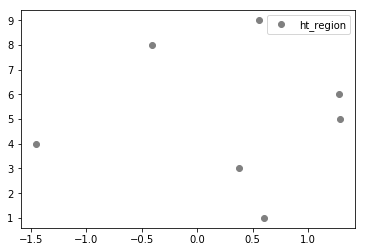

In [19]:
fnc.dotplot(df_top_and_last_ten, 'zscore_undp_hdi', 'ht_region')

In [88]:
df_my_subsample = pd.read_csv('sebastian-contreras-act05.csv') # cargar mi segmentación de datos
df_my_subsample = df_my_subsample[df_my_subsample['imf_pop'].isna() == False]
df_my_subsample = df_my_subsample[['ht_region','undp_hdi','gle_cgdpc','imf_pop']].head(10)
df_my_subsample = df_my_subsample.append(df_my_subsample[['ht_region','undp_hdi','gle_cgdpc','imf_pop']].tail(9))

## Ejercicio 5: Genere un método que devuelva un gráfico comparando dos curvas de densidad

* El método debe contener los siguientes argumentos:
    - `df1`: Su base de datos segmentada.
    - `df2`: Base segmentada de su compañero.
    - `variable`: Variable a contrastar.
    - `log`: Booleano. Si es `True` transformar la variable al logaritmo. Por defecto debe ser `False`.
* Grafique las curvas para `imf_pop`, `gle_cgdpc` y `undp_hdi`. ¿En qué casos es necesario utilizar logaritmos? ¿Por qué?

In [164]:
def curvas_densidad(df_propio, df_classmate, plot_var, log=False):
    
    """
    Función que gráfica comparación de la densidad de una variable entre dos dataframes 
    """
    
    if log == True:
        tmp_df = pd.DataFrame({
        'df_propio' : tuple(np.log(df_propio[plot_var].values)),
        'df_classmate' : tuple(np.log(df_classmate[plot_var].values))
        })
    else:
        tmp_df = pd.DataFrame({
        'df_propio' : tuple(df_propio[plot_var].values),
        'df_classmate' : tuple(df_classmate[plot_var].values)
        })

    colors = ["tomato","dodgerblue"]
    titulo = "Comparación variable {} en dos datasets".format(plot_var)

    plot = tmp_df.plot(kind='kde',use_index=True, legend=True, loglog=False,title= titulo,color = colors, figsize=(8,8))
    plot.set_xlabel(plot_var)
    
    

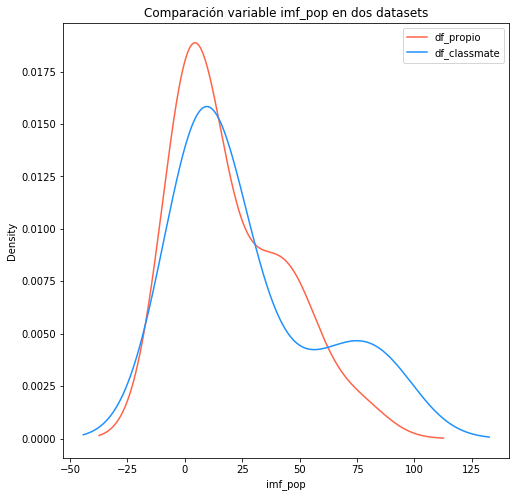

In [157]:
curvas_densidad(df_my_subsample,df_top_and_last_ten,'imf_pop', False)

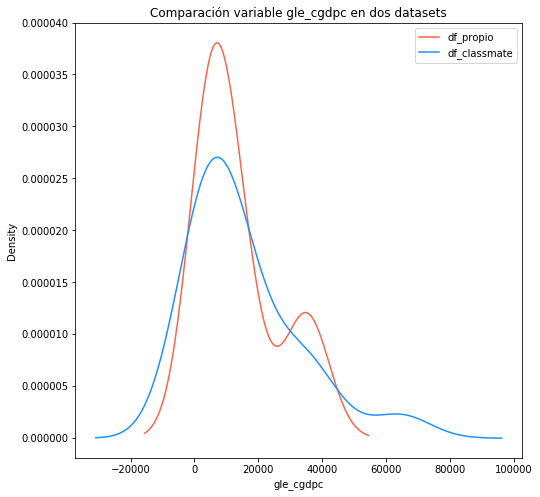

In [163]:
curvas_densidad(df_my_subsample,df_top_and_last_ten,'gle_cgdpc', False)

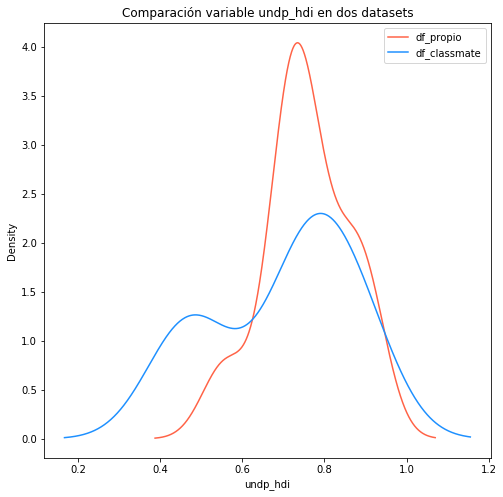

In [161]:
curvas_densidad(df_my_subsample,df_top_and_last_ten,'undp_hdi', False)

Cuando las existe poca variación entre los datos de las variables, se recomienda utilizar log